# Twitter sentimental analysis

In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

df=pd.read_csv('Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
df.shape

(162980, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


# Data Preprocessing


In [ ]:
df.isnull().sum()

,0
clean_text,4
category,7


In [ ]:

print(df[df.isnull().any(axis=1)])

                                               clean_text  category
148                                                   NaN       0.0
130448  the foundation stone northeast gas grid inaugu...       NaN
155642  dear terrorists you can run but you cant hide ...       NaN
155698  offense the best defence with mission shakti m...       NaN
155770  have always heard politicians backing out thei...       NaN
158693  modi government plans felicitate the faceless ...       NaN
158694                                                NaN      -1.0
159442               chidambaram gives praises modinomics       NaN
159443                                                NaN       0.0
160559  the reason why modi contested from seats 2014 ...       NaN
160560                                                NaN       1.0


As above some categorical are also null value we can drop as they are very limited and it will also not affect our analysis

In [ ]:
df.dropna(subset=['clean_text', 'category'],inplace=True)


In [ ]:
df.isnull().sum()

,0
clean_text,0
category,0


In [ ]:
df.category.value_counts()

,count
category,
1.0,72249
0.0,55211
-1.0,35509


# Stop words and special charachters handling

In [ ]:
pip install spacy

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
tweet=df.copy()

In [ ]:
tweet.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
#Lets split sentense column in difference series
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:

#Lets keep the copy of all_text series
all_text=df['clean_text'].apply(nlp)



In [ ]:
all_text.head()

,clean_text
0,"(when, modi, promised, “, minimum, government,..."
1,"(talk, all, the, nonsense, and, continue, all,..."
2,"(what, did, just, say, vote, for, modi, , wel..."
3,"(asking, his, supporters, prefix, chowkidar, t..."
4,"(answer, who, among, these, the, most, powerfu..."


Lematization and transformation of text

In [ ]:
def process_text(doc):
    clean_line = []

    # Process each token in the cleaned doc
    for token in doc:
        if not token.is_stop and len(token.text) > 2 and not token.is_punct and not token.is_quote:
            if token.like_num:
                clean_line.append('num')  # Replace numbers with 'num'
            elif token.like_email:
                clean_line.append('email')  # Replace email addresses with 'email'
            elif token.like_url:
                clean_line.append('url')  # Replace URLs with 'url'
            elif token.text.startswith('#'):
                clean_line.append(token.text[1:])  # Remove '#' from hashtags
            elif token.text.startswith('@'):
                clean_line.append('user')  # Replace mentions with 'user'
            else:
                clean_line.append(token.lemma_.lower())  # Lemmatize the token and convert to lowercase

    return ' '.join(clean_line)


In [ ]:
clean_text = all_text.apply(process_text)




In [ ]:
test_data = [
    "John loves to visit New York in the summer.",
    "Contact us at support@example.com for more details.",
    "Check out this awesome article: http://example.com.",
    "I had a great time at the #beach yesterday!",
    "@johndoe is attending the conference next week.",
    "This is a 100% sure thing!",
    "The weather is amazing! #sunnydays",
    "I'm looking forward to my trip to Paris!",
    "You can find the details here: https://mywebsite.com",
    "Don't forget to send your feedback to feedback@example.org."
]


processed_data = [process_text(nlp(doc)) for doc in test_data]

# Create a DataFrame
df1 = pd.DataFrame({
    'Original': test_data,
    'Processed': processed_data
})


print(df1)

                                            Original  \
0        John loves to visit New York in the summer.   
1  Contact us at support@example.com for more det...   
2  Check out this awesome article: http://example...   
3        I had a great time at the #beach yesterday!   
4    @johndoe is attending the conference next week.   
5                         This is a 100% sure thing!   
6                 The weather is amazing! #sunnydays   
7           I'm looking forward to my trip to Paris!   
8  You can find the details here: https://mywebsi...   
9  Don't forget to send your feedback to feedback...   

                         Processed  
0  john love visit new york summer  
1             contact email detail  
2        check awesome article url  
3       great time beach yesterday  
4      user attend conference week  
5                   num sure thing  
6         weather amazing sunnyday  
7          look forward trip paris  
8                  find detail url  
9       forge

In [ ]:
clean_text.head()

,clean_text
0,modi promise minimum government maximum govern...
1,talk nonsense continue drama vote modi
2,vote modi welcome bjp tell rahul main campaign...
3,ask supporter prefix chowkidar name modi great...
4,answer powerful world leader today trump putin...


In [ ]:
clean_text = clean_text.to_frame()
clean_text['category'] = df['category']


In [ ]:
clean_text.head()

,clean_text,category
0,modi promise minimum government maximum govern...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,vote modi welcome bjp tell rahul main campaign...,1.0
3,ask supporter prefix chowkidar name modi great...,1.0
4,answer powerful world leader today trump putin...,1.0


In [ ]:
clean_text.category.value_counts()

,count
category,
1.0,72249
0.0,55211
-1.0,35509


# Label Encoding
-1 → 0 (Negative)
0 → 1 (Neutral)
1 → 2 (Positive)

In [ ]:
label_mapping = {-1: 0, 0: 1, 1: 2}
clean_text['category'] = clean_text['category'].map(label_mapping)


In [ ]:
clean_text.category.value_counts()

,count
category,
2,72249
1,55211
0,35509


# As our focus is more on troll detection we train more on sample tweets so lets sampling

In [ ]:
import pandas as pd


# Sample 20,000 tweets for each category (-1, 0, and 1)
negative_tweets = clean_text[clean_text['category'] == 0].sample(n=30000, random_state=42)
neutral_tweets = clean_text[clean_text['category'] == 1].sample(n=30000, random_state=42)
positive_tweets = clean_text[clean_text['category'] == 2].sample(n=30000, random_state=42)

# Concatenate them into a new DataFrame
balanced_df = pd.concat([negative_tweets, neutral_tweets, positive_tweets])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows
print(balanced_df.head())

# Save the balanced dataset (optional)
balanced_df.to_csv("balanced_twitter_data.csv", index=False)


                                          clean_text  category
0  avuna vishnu babu cao kio praise instead modi ...         2
1  wire supreme court criticise modi govt foreign...         0
2                     modi sir trible university sir         1
3        modi confident num share optimism hope good         2
4  congratulation modi isro scienctist success fi...         2


In [ ]:
balanced_df.category.value_counts()

,count
category,
2,30000
0,30000
1,30000


So from above data is much sample for analysis

In [ ]:
sentences=balanced_df['clean_text'].values
labels=balanced_df.category.values

In [ ]:
sentences.shape


(90000,)

In [ ]:
labels.shape

(90000,)

# Deberta
# Train classification model
reference
[DeBERTa for Sequence Classification - Hugging Face](https://huggingface.co/docs/transformers/v4.48.2/en/model_doc/deberta#transformers.DebertaForSequenceClassification)


In [ ]:
from transformers import DebertaTokenizer

tokenizer = DebertaTokenizer.from_pretrained("microsoft/deberta-base")


# Load the Deberta tokenizer.
print('Loading Deberta tokenizer...') #hhhhjkl
tokenizer = DebertaTokenizer.from_pretrained("microsoft/deberta-base")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

Loading Deberta tokenizer...


In [ ]:

# Print the original sentence.
print(' Original: ', sentences[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

 Original:  avuna vishnu babu cao kio praise instead modi provide infrastructure like water electricity land road company fully aware water facility come place pattu sima project
Tokenized:  ['av', 'una', 'Ġv', 'ish', 'nu', 'Ġbab', 'u', 'Ġca', 'o', 'Ġk', 'io', 'Ġpraise', 'Ġinstead', 'Ġmod', 'i', 'Ġprovide', 'Ġinfrastructure', 'Ġlike', 'Ġwater', 'Ġelectricity', 'Ġland', 'Ġroad', 'Ġcompany', 'Ġfully', 'Ġaware', 'Ġwater', 'Ġfacility', 'Ġcome', 'Ġplace', 'Ġp', 'att', 'u', 'Ġsim', 'a', 'Ġproject']
Token IDs:  [1469, 4989, 748, 1173, 18373, 30301, 257, 6056, 139, 449, 1020, 8249, 1386, 11134, 118, 694, 2112, 101, 514, 4382, 1212, 921, 138, 1950, 2542, 514, 2122, 283, 317, 181, 2611, 257, 16207, 102, 695]


In [ ]:


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,           # Pad & truncate all sentences.
                        pad_to_max_length = 'max_length',
                        truncation=True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  avuna vishnu babu cao kio praise instead modi provide infrastructure like water electricity land road company fully aware water facility come place pattu sima project
Token IDs: tensor([    1,  1469,  4989,   748,  1173, 18373, 30301,   257,  6056,   139,
          449,  1020,  8249,  1386, 11134,   118,   694,  2112,   101,   514,
         4382,  1212,   921,   138,  1950,  2542,   514,  2122,   283,   317,
          181,  2611,   257, 16207,   102,   695,     2,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


#Training and validation split

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

81,000 training samples
9,000 validation samples


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning Deberta on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import DebertaForSequenceClassification, AdamW, DebertaConfig

# Load DeBERTaForSequenceClassification, the pretrained DeBERTa model with a single
# linear classification layer on top.

model = DebertaForSequenceClassification.from_pretrained(
    "microsoft/deberta-base",  # Use the DeBERTa base model
    num_labels = 3,  # The number of output labels--2 for binary classification.
                     # You can increase this for multi-class tasks.
    output_attentions = False,  # Whether the model returns attention weights.
    output_hidden_states = False,  # Whether the model returns all hidden states.

)

# Move the model to the device
model.to(device)

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DebertaForSequenceClassification(
  (deberta): DebertaModel(
    (embeddings): DebertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=0)
      (LayerNorm): DebertaLayerNorm()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): DebertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x DebertaLayer(
          (attention): DebertaAttention(
            (self): DisentangledSelfAttention(
              (in_proj): Linear(in_features=768, out_features=2304, bias=False)
              (pos_dropout): Dropout(p=0.1, inplace=False)
              (pos_proj): Linear(in_features=768, out_features=768, bias=False)
              (pos_q_proj): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): DebertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): DebertaLayerNorm()
              (dropout): Dropout(p=0

In [ ]:
# Get all of the model's parameters as a list of tuples
params = list(model.named_parameters())

print(f'The DeBERTa model has {len(params)} different named parameters.\n')

print('==== Embedding Layer ====\n')
for p in params[:5]:  # First few parameters (word embeddings, position embeddings, etc.)
    print(f"{p[0]:<55} {str(tuple(p[1].size())):>12}")

print('\n==== First Transformer Layer ====\n')
for p in params[5:21]:  # Parameters related to the first transformer block
    print(f"{p[0]:<55} {str(tuple(p[1].size())):>12}")

print('\n==== Output Layer ====\n')
for p in params[-4:]:  # Final output-related parameters
    print(f"{p[0]:<55} {str(tuple(p[1].size())):>12}")

The DeBERTa model has 200 different named parameters.

==== Embedding Layer ====

deberta.embeddings.word_embeddings.weight               (50265, 768)
deberta.embeddings.LayerNorm.weight                           (768,)
deberta.embeddings.LayerNorm.bias                             (768,)
deberta.encoder.layer.0.attention.self.q_bias                 (768,)
deberta.encoder.layer.0.attention.self.v_bias                 (768,)

==== First Transformer Layer ====

deberta.encoder.layer.0.attention.self.in_proj.weight    (2304, 768)
deberta.encoder.layer.0.attention.self.pos_proj.weight    (768, 768)
deberta.encoder.layer.0.attention.self.pos_q_proj.weight   (768, 768)
deberta.encoder.layer.0.attention.self.pos_q_proj.bias        (768,)
deberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
deberta.encoder.layer.0.attention.output.dense.bias           (768,)
deberta.encoder.layer.0.attention.output.LayerNorm.weight       (768,)
deberta.encoder.layer.0.attention.output.LayerNorm.

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch)
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


This training code is based on the [run_glue.py script](https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/run_glue.py) from Hugging Face.

In [ ]:
import random
import numpy as np
# This training code is based on the `run_glue.py` script here
# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss,
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training

    model.train() # only needed when batchnorm / dropout layers are used

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".

        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here:

        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.

        outputs = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        # print(type(outputs),type(outputs[0]))
        loss, logits = outputs[0], outputs[1]


        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here:
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            outputs = model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)

        # Accumulate the validation loss.
        loss, logits = outputs[0], outputs[1]
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.






    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...


model.safetensors:   0%|          | 0.00/559M [00:00<?, ?B/s]

  Batch    40  of  2,532.    Elapsed: 0:00:25.
  Batch    80  of  2,532.    Elapsed: 0:00:49.
  Batch   120  of  2,532.    Elapsed: 0:01:13.
  Batch   160  of  2,532.    Elapsed: 0:01:37.
  Batch   200  of  2,532.    Elapsed: 0:02:02.
  Batch   240  of  2,532.    Elapsed: 0:02:26.
  Batch   280  of  2,532.    Elapsed: 0:02:51.
  Batch   320  of  2,532.    Elapsed: 0:03:16.
  Batch   360  of  2,532.    Elapsed: 0:03:41.
  Batch   400  of  2,532.    Elapsed: 0:04:06.
  Batch   440  of  2,532.    Elapsed: 0:04:31.
  Batch   480  of  2,532.    Elapsed: 0:04:56.
  Batch   520  of  2,532.    Elapsed: 0:05:21.
  Batch   560  of  2,532.    Elapsed: 0:05:46.
  Batch   600  of  2,532.    Elapsed: 0:06:11.
  Batch   640  of  2,532.    Elapsed: 0:06:36.
  Batch   680  of  2,532.    Elapsed: 0:07:02.
  Batch   720  of  2,532.    Elapsed: 0:07:27.
  Batch   760  of  2,532.    Elapsed: 0:07:52.
  Batch   800  of  2,532.    Elapsed: 0:08:17.
  Batch   840  of  2,532.    Elapsed: 0:08:43.
  Batch   880

In [ ]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './model_save/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to ./model_save/


('./model_save/tokenizer_config.json',
 './model_save/special_tokens_map.json',
 './model_save/vocab.json',
 './model_save/merges.txt',
 './model_save/added_tokens.json')

use early stopping in above to solve issue of validation loss increasing

In [ ]:
import pandas as pd

pd.set_option('display.precision', 2)


# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.58,0.50,0.82,0:26:31,0:00:59
2,0.45,0.47,0.84,0:26:40,0:00:59
3,0.39,0.47,0.84,0:26:40,0:00:59


In [ ]:
clean_text.shape

(162969, 2)

In [ ]:
# Find the rows in clean_tweets that are not in balanced_df
validation_tweets = clean_text.loc[~clean_text.index.isin(balanced_df.index)]

validation_tweets.head()

,clean_text,category
90000,proud indian hai sab acha,2
90001,modi hopei wish people expect muchbut need ans...,1
90002,handle suspend reason pls check handle modi su...,2
90003,modi member bjp right face website meme poke f...,2
90004,actually rip apart primary barnmala education ...,2


In [ ]:
validation_tweets.shape

(72970, 2)

In [ ]:
# Separate tweets by category
validation_negative_tweets = validation_tweets[validation_tweets['category'] == 0]
validation_neutral_tweets = validation_tweets[validation_tweets['category'] == 1]
validation_positive_tweets = validation_tweets[validation_tweets['category'] == 2]

# Sample tweets
sampled_negative = validation_negative_tweets.sample(n=3000, random_state=42)
sampled_neutral = validation_neutral_tweets.sample(n=1000, random_state=42)
sampled_positive = validation_positive_tweets.sample(n=1000, random_state=42)

# Concatenate sampled tweets
validation_df = pd.concat([sampled_negative, sampled_neutral, sampled_positive])

# Shuffle the DataFrame
validation_df = validation_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the final validation DataFrame
validation_df.head()



,clean_text,category
0,arabic kill journalist modi dude kill journalism,0
1,billionaire jeweller nirav modi deny bail lond...,0
2,humble request bharatiya waste valuable vote m...,0
3,shocking modi exploit office deve gowda condem...,0
4,educate people hate narendra modi country,0


In [ ]:
validation_df.shape

(5000, 2)

In [ ]:
validation_df.category.value_counts()

,count
category,
0,3000
1,1000
2,1000


In [ ]:
# Reset the index of the DataFrame
validation_df = validation_df.reset_index(drop=True)



In [ ]:
validation_df.head()

,clean_text,category
0,arabic kill journalist modi dude kill journalism,0
1,billionaire jeweller nirav modi deny bail lond...,0
2,humble request bharatiya waste valuable vote m...,0
3,shocking modi exploit office deve gowda condem...,0
4,educate people hate narendra modi country,0


# Evaluation of data

In [ ]:


output_dir = "./model_save/"

print(output_dir)

./model_save/


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
import torch

# Define label mappings
id2label = {0: "NEGATIVE", 1: "NEUTRAL", 2: "Positive"}
label2id = {"NEGATIVE": 0, "NEUTRAL": 1, "Positive": 2}

# Define the model directory
output_dir = "./model_save/"

# Load the tokenizer and model
print("Loading Deberta tokenizer and model...")
tokenizer = AutoTokenizer.from_pretrained(output_dir)
model_loaded = AutoModelForSequenceClassification.from_pretrained(output_dir, num_labels=3, id2label=id2label, label2id=label2id)

# Create a pipeline for text classification
pipeline = TextClassificationPipeline(model=model_loaded, tokenizer=tokenizer, device=0)  # Use GPU if available

print("Model and tokenizer loaded successfully!")


Loading Deberta tokenizer and model...


Device set to use cuda:0


Model and tokenizer loaded successfully!


In [ ]:
corpus = list(validation_df['clean_text'].values)


In [ ]:
validation_df['pred_tweet']=pipeline(corpus)

In [ ]:
validation_df.head()

,clean_text,category,pred_tweet
0,arabic kill journalist modi dude kill journalism,0,"{'label': 'NEGATIVE', 'score': 0.9217934608459..."
1,billionaire jeweller nirav modi deny bail lond...,0,"{'label': 'NEGATIVE', 'score': 0.8939696550369..."
2,humble request bharatiya waste valuable vote m...,0,"{'label': 'NEGATIVE', 'score': 0.9700070023536..."
3,shocking modi exploit office deve gowda condem...,0,"{'label': 'NEGATIVE', 'score': 0.9942700862884..."
4,educate people hate narendra modi country,0,"{'label': 'NEGATIVE', 'score': 0.8987753987312..."


In [ ]:
validation_df.pred_tweet.value_counts()

,count
pred_tweet,
"{'label': 'NEUTRAL', 'score': 0.9795910120010376}",13
"{'label': 'NEGATIVE', 'score': 0.9820114374160767}",3
"{'label': 'NEGATIVE', 'score': 0.9803398251533508}",3
"{'label': 'NEGATIVE', 'score': 0.9848951697349548}",2
"{'label': 'NEGATIVE', 'score': 0.6748840808868408}",2
...,...
"{'label': 'NEUTRAL', 'score': 0.8260863423347473}",1
"{'label': 'NEGATIVE', 'score': 0.7649989724159241}",1
"{'label': 'NEGATIVE', 'score': 0.9739308953285217}",1


In [ ]:
validation_df['pred_label'] = [x.get('label') for x in validation_df['pred_tweet']]

validation_df['pred_score'] = [x.get('score') for x in validation_df['pred_tweet']]

In [ ]:
validation_df.pred_label.value_counts()

,count
pred_label,
NEGATIVE,2769
NEUTRAL,1219
Positive,1012


In [ ]:
validation_df.pred_label.value_counts()

,count
pred_label,
NEGATIVE,2769
NEUTRAL,1219
Positive,1012


In [ ]:
# Assuming your 'pred_label' column has the values 'NEGATIVE', 'NEUTRAL', and 'TROLL'
validation_df['troll_pred'] = validation_df['pred_label'].map({'NEGATIVE': 0, 'NEUTRAL': 1, 'Positive': 2})

# To count the occurrences of each class (0, 1, 2)
count = validation_df['troll_pred'].value_counts().sort_index()

print(count)


troll_pred
0    2769
1    1219
2    1012
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(
    validation_df["category"].values,
    validation_df["troll_pred"].values,

)

print(report)


              precision    recall  f1-score   support

           0       0.95      0.88      0.91      3000
           1       0.74      0.90      0.81      1000
           2       0.79      0.80      0.79      1000

    accuracy                           0.86      5000
   macro avg       0.82      0.86      0.84      5000
weighted avg       0.87      0.86      0.87      5000



In [ ]:
# Define the output directory in Google Drive
output_dir = '/content/drive/MyDrive/model_save/'

# Save your model and tokenizer to Google Drive
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved successfully in {output_dir}")


Model and tokenizer saved successfully in /content/drive/MyDrive/model_save/


In [ ]:
clean_text

,clean_text,category
0,modi promise minimum government maximum govern...,0
1,talk nonsense continue drama vote modi,1
2,vote modi welcome bjp tell rahul main campaign...,2
3,ask supporter prefix chowkidar name modi great...,2
4,answer powerful world leader today trump putin...,2
...,...,...
162975,num crore pay neerav modi recover congress lea...,0
162976,dear rss terrorist payal gawar modi kill num p...,0
162977,cover interaction forum leave,1
162978,big project come india modi dream project happ...,1


In [ ]:
validation_df

,clean_text,category,pred_tweet,pred_label,pred_score,troll_pred
0,arabic kill journalist modi dude kill journalism,0,"{'label': 'NEGATIVE', 'score': 0.9217934608459...",NEGATIVE,0.92,0
1,billionaire jeweller nirav modi deny bail lond...,0,"{'label': 'NEGATIVE', 'score': 0.8939696550369...",NEGATIVE,0.89,0
2,humble request bharatiya waste valuable vote m...,0,"{'label': 'NEGATIVE', 'score': 0.9700070023536...",NEGATIVE,0.97,0
3,shocking modi exploit office deve gowda condem...,0,"{'label': 'NEGATIVE', 'score': 0.9942700862884...",NEGATIVE,0.99,0
4,educate people hate narendra modi country,0,"{'label': 'NEGATIVE', 'score': 0.8987753987312...",NEGATIVE,0.90,0
...,...,...,...,...,...,...
4995,wat need use word repeat frequently like chowk...,2,"{'label': 'NEGATIVE', 'score': 0.5473015308380...",NEGATIVE,0.55,0
4996,farmer ignore congress today modi bjp governme...,0,"{'label': 'NEUTRAL', 'score': 0.5329890847206116}",NEUTRAL,0.53,1
4997,know pakistan majority indians want modi losey,1,"{'label': 'Positive', 'score': 0.6081739068031...",Positive,0.61,2
4998,want eat salad rate vote modi,1,"{'label': 'NEUTRAL', 'score': 0.8862619996070862}",NEUTRAL,0.89,1


In [ ]:
cm = confusion_matrix(validation_df["category"].values, validation_df["troll_pred"].values)
cm

array([[2625,  197,  178],
       [  60,  901,   39],
       [  84,  121,  795]])

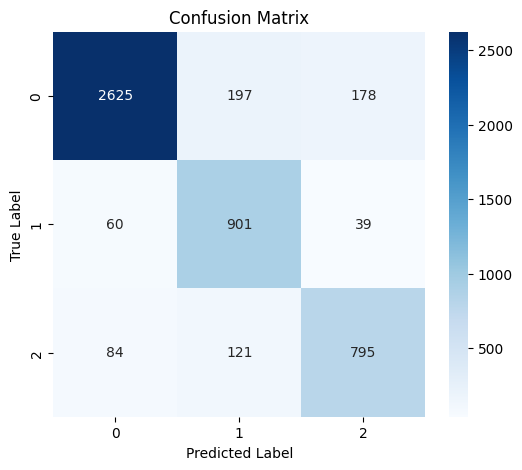

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example: predicted and actual labels
y_true = validation_df.category
y_pred = validation_df.troll_pred

# Define the labels
labels = [0, 1, 2]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

### Classification Summary

True Positives:
- Class 0: 2625
- Class 1: 901
- Class 2: 795

False Positives:
- Class 0: 375
- Class 1: 181
- Class 2: 123

False Negatives:
- Class 0: 375
- Class 1: 99
- Class 2: 205


              precision    recall  f1-score   support

      Class 0      0.95      0.88      0.91      3000
      Class 1      0.74      0.90      0.81      1000
      Class 2      0.79      0.80      0.79      1000
